In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data:

In [2]:
#read in the data
df = pd.read_csv('data/cumulative_clean.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201 entries, 0 to 9200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9201 non-null   int64  
 1   kepoi_name         9201 non-null   object 
 2   kepler_name        2742 non-null   object 
 3   koi_disposition    9201 non-null   int64  
 4   koi_pdisposition   9201 non-null   int64  
 5   koi_score          7995 non-null   float64
 6   koi_fpflag_nt      9201 non-null   int64  
 7   koi_fpflag_ss      9201 non-null   int64  
 8   koi_fpflag_co      9201 non-null   int64  
 9   koi_fpflag_ec      9201 non-null   int64  
 10  koi_period         9201 non-null   float64
 11  koi_time0bk        9201 non-null   float64
 12  koi_impact         9201 non-null   float64
 13  koi_duration       9201 non-null   float64
 14  koi_depth          9201 non-null   float64
 15  koi_prad           9201 non-null   float64
 16  koi_teq            9201 

### Select Features:

In [3]:
#Removing the unnecessary features
#drop columns with greater than 500 null values
missing_values_count = df.isnull().sum()
columns_to_keep = missing_values_count[missing_values_count <= 500].index
df_filtered = df[columns_to_keep]
#remove kepid, kepoi_name, koi_pdisposition and koi_tce_delivname
df_filtered = df_filtered.drop(['kepid','kepoi_name','koi_pdisposition','koi_tce_delivname'], axis=1)
df_filtered

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,2,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,1,0,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,0,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,2,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,0,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,...,2088.0,4500.53,453.3,1.0,5638.0,4.529,0.903,297.18875,47.093819,14.082
9197,1,0,0,0,0,1.739849,133.001270,0.043,3.11400,48.5,...,1608.0,1585.81,10.6,1.0,6119.0,4.444,1.031,286.50937,47.163219,14.757
9198,0,0,0,1,0,0.681402,132.181750,0.147,0.86500,103.6,...,2218.0,5713.41,12.3,1.0,6173.0,4.447,1.041,294.16489,47.176281,15.385
9199,1,0,0,0,0,333.486169,153.615010,0.214,3.19900,639.1,...,557.0,22.68,14.0,1.0,4989.0,2.992,7.824,296.76288,47.145142,10.998


In [4]:
# Dealing with null data fields with mean values
df_filtered.fillna(df_filtered.mean(), inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201 entries, 0 to 9200
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   9201 non-null   int64  
 1   koi_fpflag_nt     9201 non-null   int64  
 2   koi_fpflag_ss     9201 non-null   int64  
 3   koi_fpflag_co     9201 non-null   int64  
 4   koi_fpflag_ec     9201 non-null   int64  
 5   koi_period        9201 non-null   float64
 6   koi_time0bk       9201 non-null   float64
 7   koi_impact        9201 non-null   float64
 8   koi_duration      9201 non-null   float64
 9   koi_depth         9201 non-null   float64
 10  koi_prad          9201 non-null   float64
 11  koi_teq           9201 non-null   float64
 12  koi_insol         9201 non-null   float64
 13  koi_model_snr     9201 non-null   float64
 14  koi_tce_plnt_num  9201 non-null   float64
 15  koi_steff         9201 non-null   float64
 16  koi_slogg         9201 non-null   float64


### Correlations between columns

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
koi_disposition,1.000000,-0.013027,-0.507267,-0.465452,-0.345992,-0.006927,-0.034101,-0.066041,-0.161506,-0.253492,...,-0.276823,-0.041199,-0.223738,0.221243,-0.205717,0.163037,-0.078463,-0.157874,0.106874,0.052254
koi_fpflag_nt,-0.013027,1.000000,-0.022295,-0.003622,0.001408,0.001458,0.015797,0.001844,0.015673,-0.005423,...,-0.004703,-0.000111,-0.007878,-0.002689,0.001885,-0.001982,0.000393,0.012880,0.008734,-0.003070
koi_fpflag_ss,-0.507267,-0.022295,1.000000,0.146250,0.092138,-0.020058,-0.114712,0.042286,0.027303,0.426244,...,0.204909,0.039754,0.437881,-0.185361,0.107830,-0.076140,0.047205,0.087949,-0.046906,-0.006369
koi_fpflag_co,-0.465452,-0.003622,0.146250,1.000000,0.523869,-0.020458,-0.124212,0.005343,-0.049410,-0.125225,...,0.268092,0.023013,-0.127536,-0.133835,0.017717,-0.018899,0.041572,0.164459,-0.099786,0.058849
koi_fpflag_ec,-0.345992,0.001408,0.092138,0.523869,1.000000,-0.016652,-0.100866,-0.004968,0.017904,-0.086800,...,0.217612,0.030385,-0.089809,-0.096433,0.011633,0.002046,0.019290,0.072611,-0.046096,0.036961
koi_period,-0.006927,0.001458,-0.020058,-0.020458,-0.016652,1.000000,0.094903,0.004928,0.037294,-0.009180,...,-0.049097,-0.002593,-0.009614,-0.001129,-0.013552,0.001877,-0.000993,0.005918,0.011502,-0.010644
koi_time0bk,-0.034101,0.015797,-0.114712,-0.124212,-0.100866,0.094903,1.000000,0.049241,0.220582,-0.051015,...,-0.324462,-0.022194,-0.058781,0.004866,0.008367,-0.006220,-0.004924,-0.030237,0.011177,0.006540
koi_impact,-0.066041,0.001844,0.042286,0.005343,-0.004968,0.004928,0.049241,1.000000,0.036955,0.005595,...,-0.009982,-0.003659,-0.000476,-0.007656,0.016070,-0.059275,0.022645,0.022464,-0.001804,-0.009796
koi_duration,-0.161506,0.015673,0.027303,-0.049410,0.017904,0.037294,0.220582,0.036955,1.000000,0.067275,...,-0.194730,-0.018874,0.083584,-0.008999,0.106203,-0.122239,0.013675,0.032404,-0.027327,-0.102324
koi_depth,-0.253492,-0.005423,0.426244,-0.125225,-0.086800,-0.009180,-0.051015,0.005595,0.067275,1.000000,...,0.080735,-0.006310,0.579725,-0.094385,0.113608,-0.008365,-0.016826,0.028558,-0.018076,0.042709


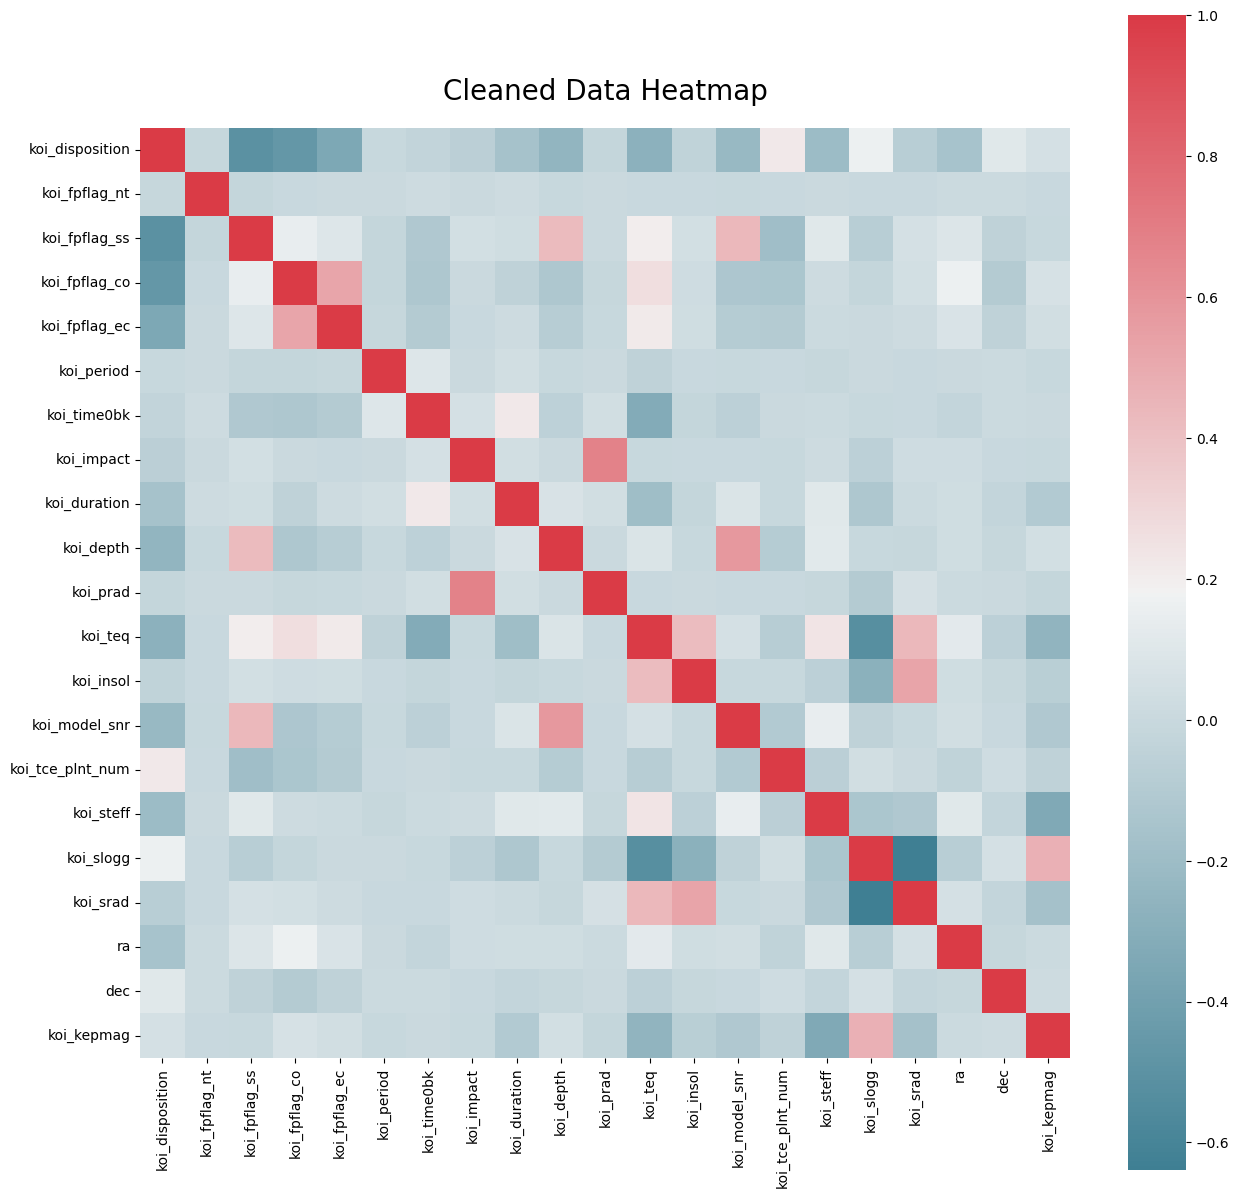

In [5]:
# Building a correlation matrix
corr = df_filtered.corr()
display(corr)
# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Cleaned Data Heatmap', fontsize=20, pad=20)
plt.show()

Text(0.5, 1.02, 'Pair Plot of Data by KOI Disposition')

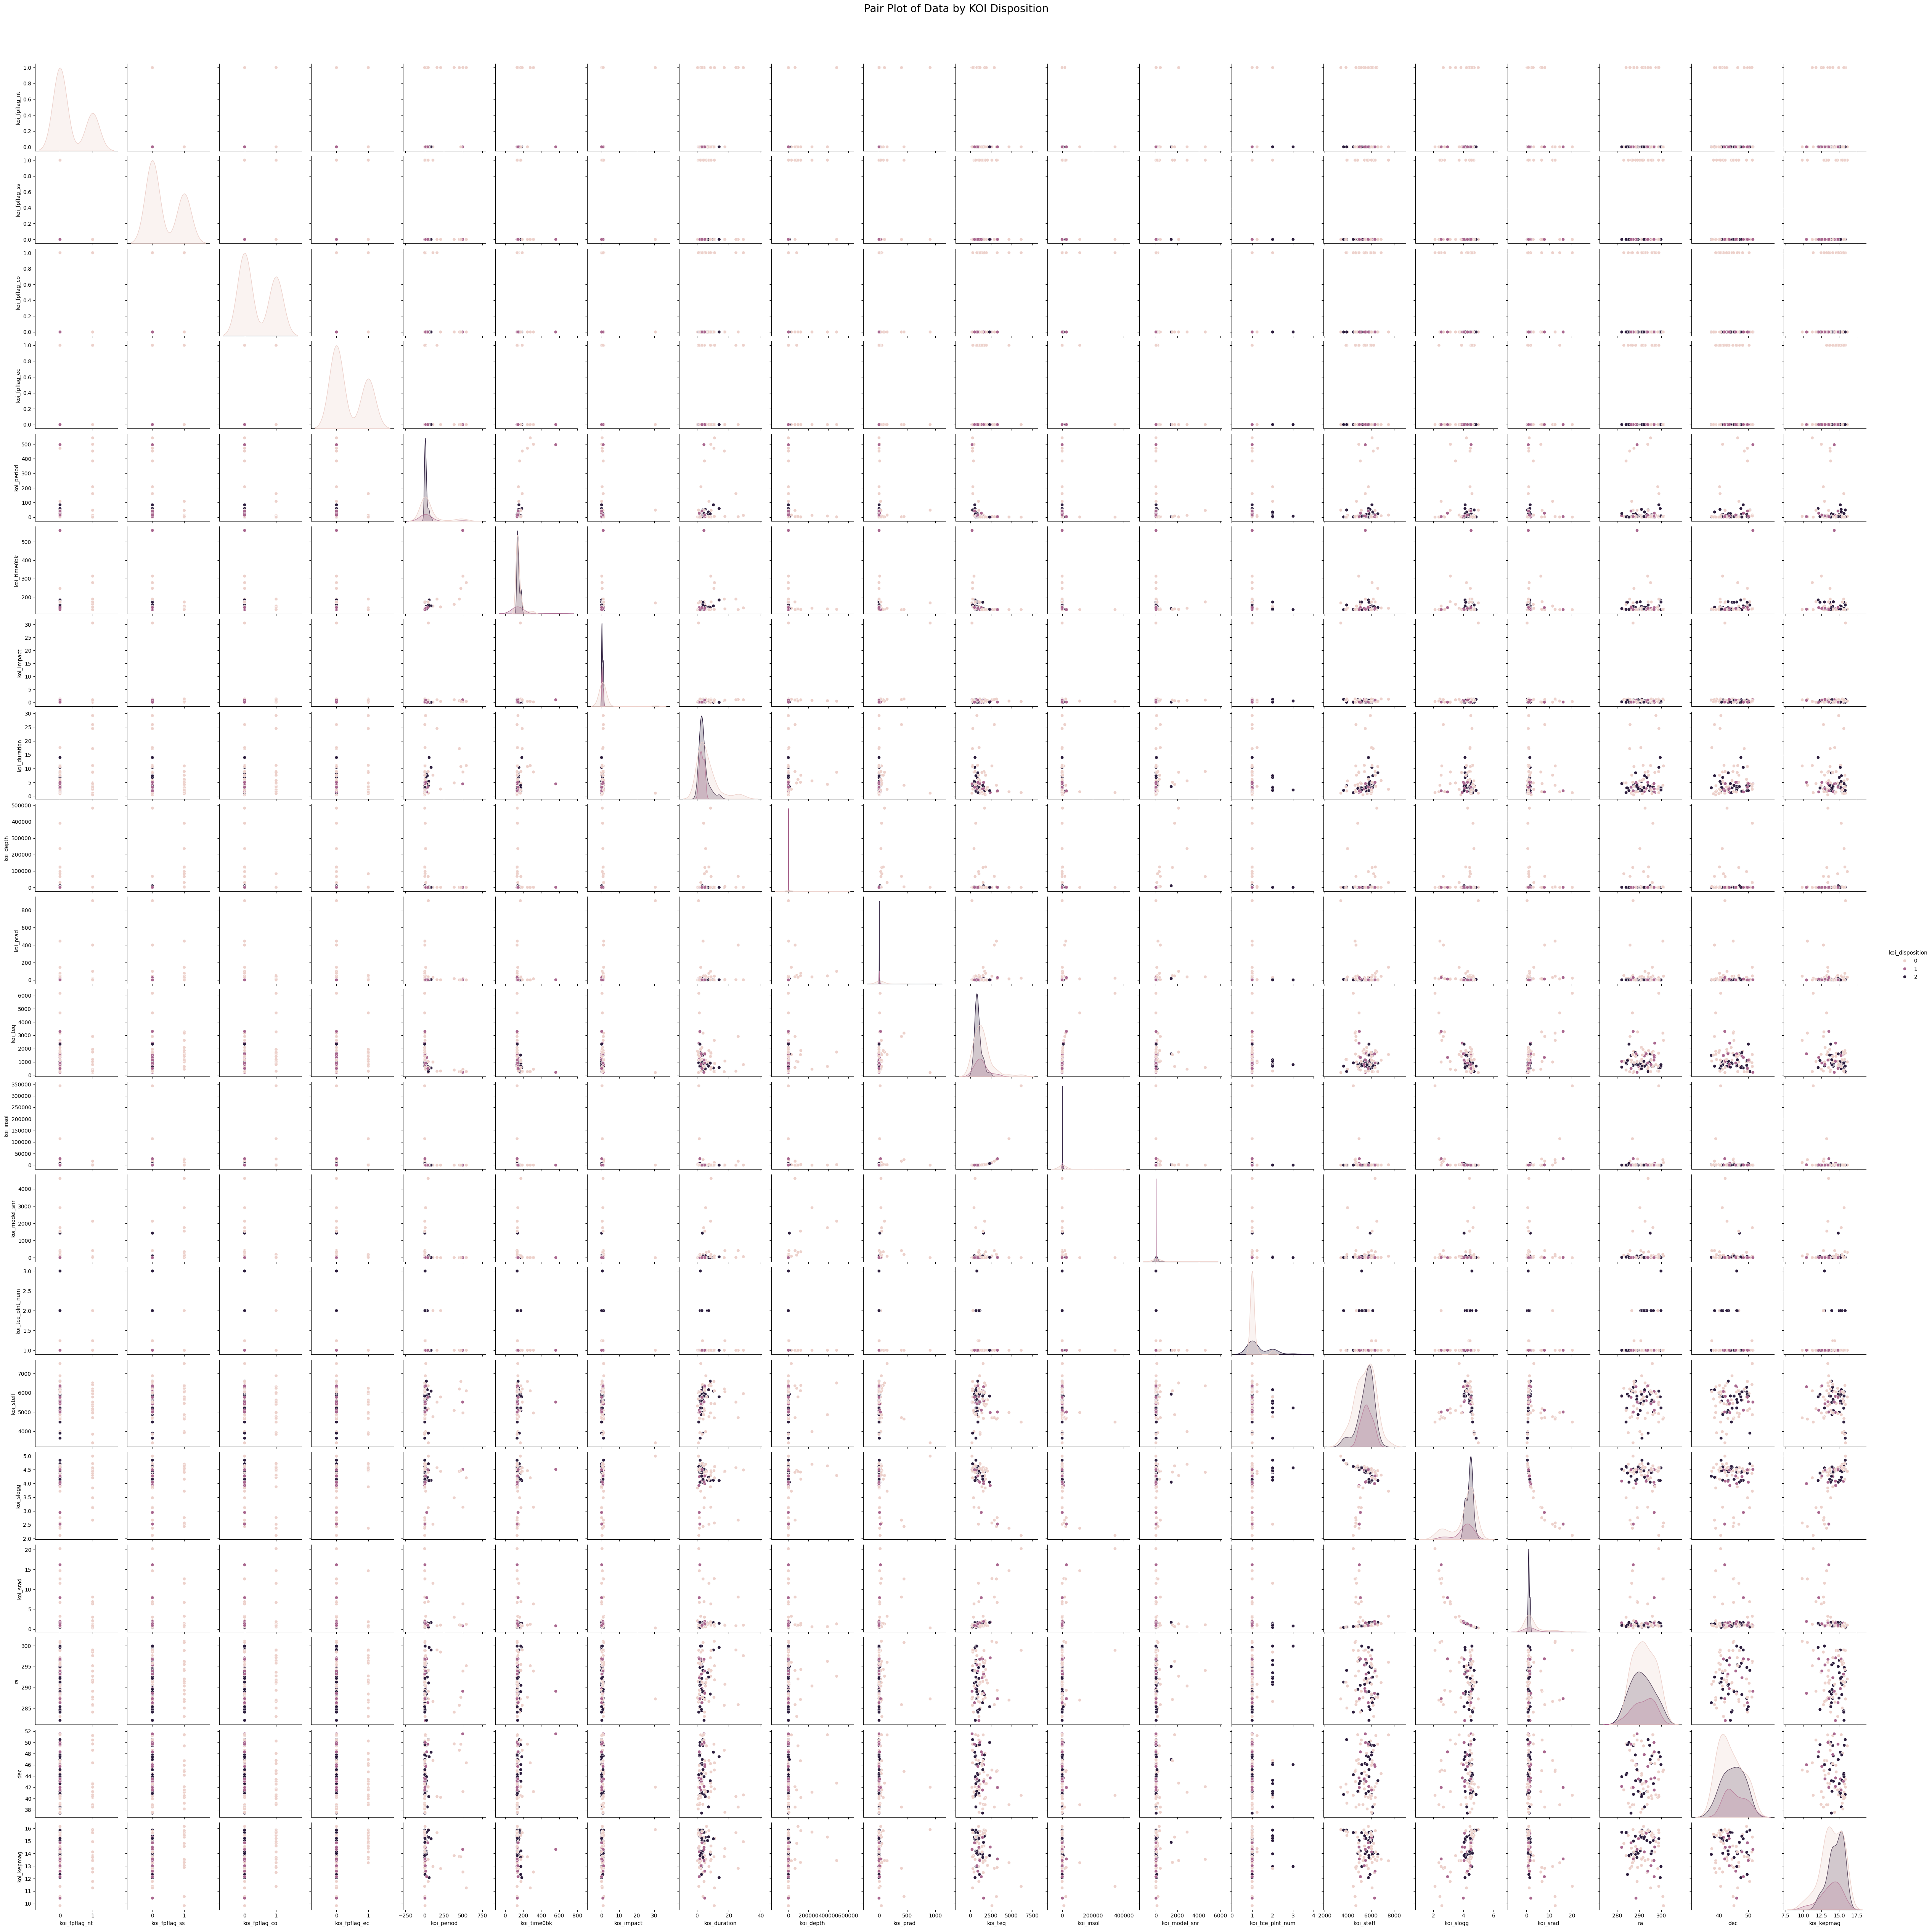

In [6]:
# sample data for processing
sampled_df = df_filtered.sample(frac=0.01)

# Create the pair plot
pairplot_fig = sns.pairplot(sampled_df, hue='koi_disposition')

# Add a title to the pair plot
pairplot_fig.fig.suptitle('Pair Plot of Data by KOI Disposition', size=20, y=1.02)

### PCA:
After conducting PCA, it is essential to determine the number of principal components to retain by examining the variance that each component explains. Our assessment concludes that retaining ten components is optimal for our analysis, as they cumulatively account for 95% of the variance in our data.

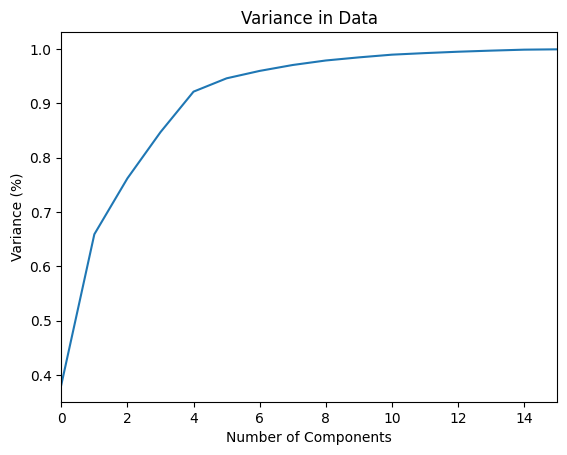

[0.38192735 0.65906318 0.76192336 0.84689481 0.92142172 0.94592255
 0.95957228 0.97043923 0.97872955 0.98444626 0.98944015 0.99232521
 0.99484814 0.99686837 0.99863981 0.99925586 0.99945192 0.9996399
 0.99982056 1.        ]


In [7]:
# remove the koi_disposition column since it is the target
data = df_filtered.iloc[:, 1:].values  
# Standardizing the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
# Applying PCA
pca = PCA().fit(data_scaled)
# plot the cumulative sum of explained variance ratio
plt.figure()
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.xlim((0, 15))
plt.title('Variance in Data')
plt.show()
# print the cumulative sum of explained variance ratio
print(np.cumsum(pca.explained_variance_ratio_))

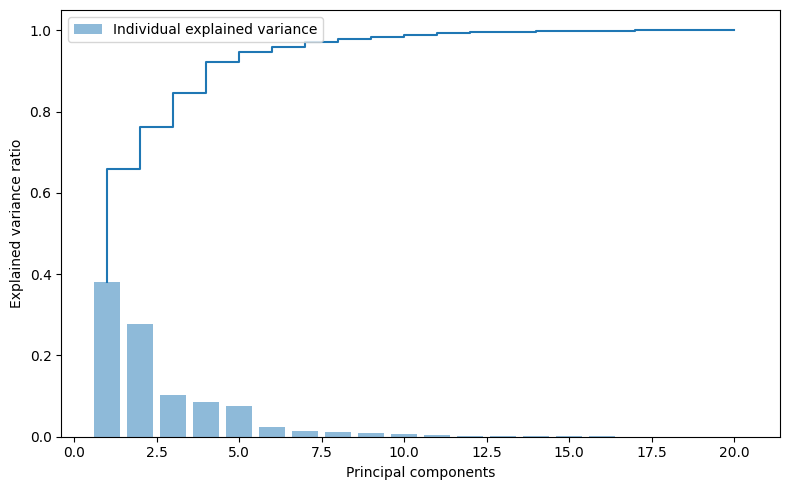

In [8]:
# draw the scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Create a DataFrame with Principal Components

In [9]:
# select the number of components
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(data_scaled)
# transform the data
reduced_data = pca.transform(data_scaled)
# create a new DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
display(reduced_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.343261,-0.075970,0.051422,0.253849,0.003980,-0.081244,-0.046744,-0.022759,0.019250,-0.009743
1,-0.349865,-0.078894,0.052039,0.253623,0.004118,-0.082667,0.093064,0.005999,0.026055,0.003545
2,-0.321802,-0.076565,0.002281,0.288557,-0.218721,-0.099134,-0.046764,-0.009863,0.000027,-0.020812
3,0.161064,0.768946,0.157681,0.231093,0.325747,-0.102315,-0.000461,-0.066408,0.003374,-0.032903
4,-0.354786,-0.074329,0.082732,0.237158,0.141916,-0.065260,-0.053054,-0.025489,0.040814,-0.048248


### Visualize the PCA Results:

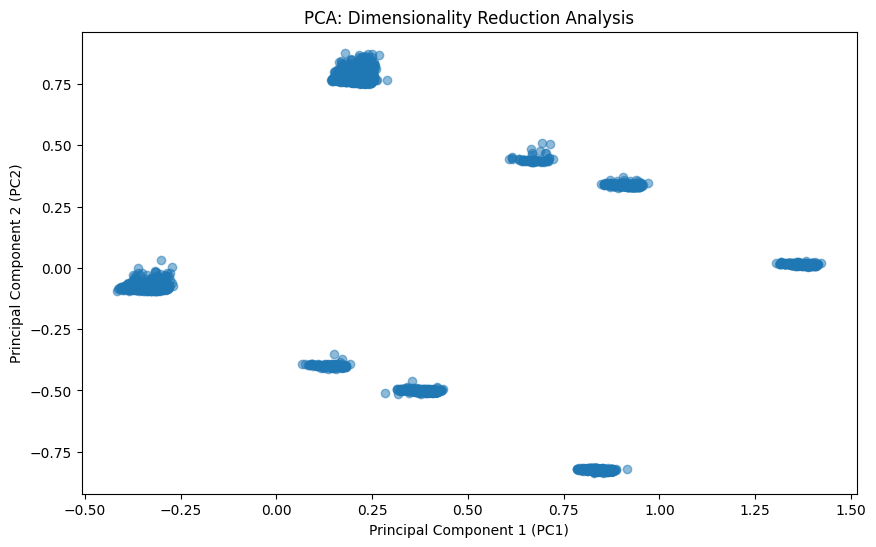

In [10]:
# 2D plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.5)
plt.title('PCA: Dimensionality Reduction Analysis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

### PCA Correlation Analysis

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,koi_disposition
PC1,1.000000e+00,4.256989e-16,5.316058e-16,3.345737e-17,-3.038695e-16,2.651800e-16,7.278792e-16,1.619010e-16,-7.125018e-16,-1.245230e-15,-0.635769
PC2,4.256989e-16,1.000000e+00,-1.007991e-15,4.415543e-16,8.351589e-16,2.058593e-16,-5.491479e-16,-1.384342e-15,-7.035774e-16,1.073697e-16,-0.167073
PC3,5.316058e-16,-1.007991e-15,1.000000e+00,4.070813e-17,-5.921577e-16,-3.030103e-16,2.509183e-18,4.068573e-16,-2.332013e-16,-3.766191e-16,0.033986
PC4,3.345737e-17,4.415543e-16,4.070813e-17,1.000000e+00,3.624030e-16,-5.213423e-17,-5.517872e-16,-5.946335e-16,1.362226e-16,-4.668513e-16,0.023277
PC5,-3.038695e-16,8.351589e-16,-5.921577e-16,3.624030e-16,1.000000e+00,-3.454274e-16,-1.728582e-16,9.364930e-16,-8.334745e-16,9.174312e-17,0.031514
PC6,2.651800e-16,2.058593e-16,-3.030103e-16,-5.213423e-17,-3.454274e-16,1.000000e+00,-5.180663e-16,-5.975747e-16,-5.584087e-16,1.173810e-16,-0.111852
PC7,7.278792e-16,-5.491479e-16,2.509183e-18,-5.517872e-16,-1.728582e-16,-5.180663e-16,1.000000e+00,-9.435350e-16,-4.244063e-16,-7.121351e-16,0.103360
PC8,1.619010e-16,-1.384342e-15,4.068573e-16,-5.946335e-16,9.364930e-16,-5.975747e-16,-9.435350e-16,1.000000e+00,-3.663126e-16,1.510846e-16,-0.062381
PC9,-7.125018e-16,-7.035774e-16,-2.332013e-16,1.362226e-16,-8.334745e-16,-5.584087e-16,-4.244063e-16,-3.663126e-16,1.000000e+00,9.155623e-16,-0.031245
PC10,-1.245230e-15,1.073697e-16,-3.766191e-16,-4.668513e-16,9.174312e-17,1.173810e-16,-7.121351e-16,1.510846e-16,9.155623e-16,1.000000e+00,-0.101421


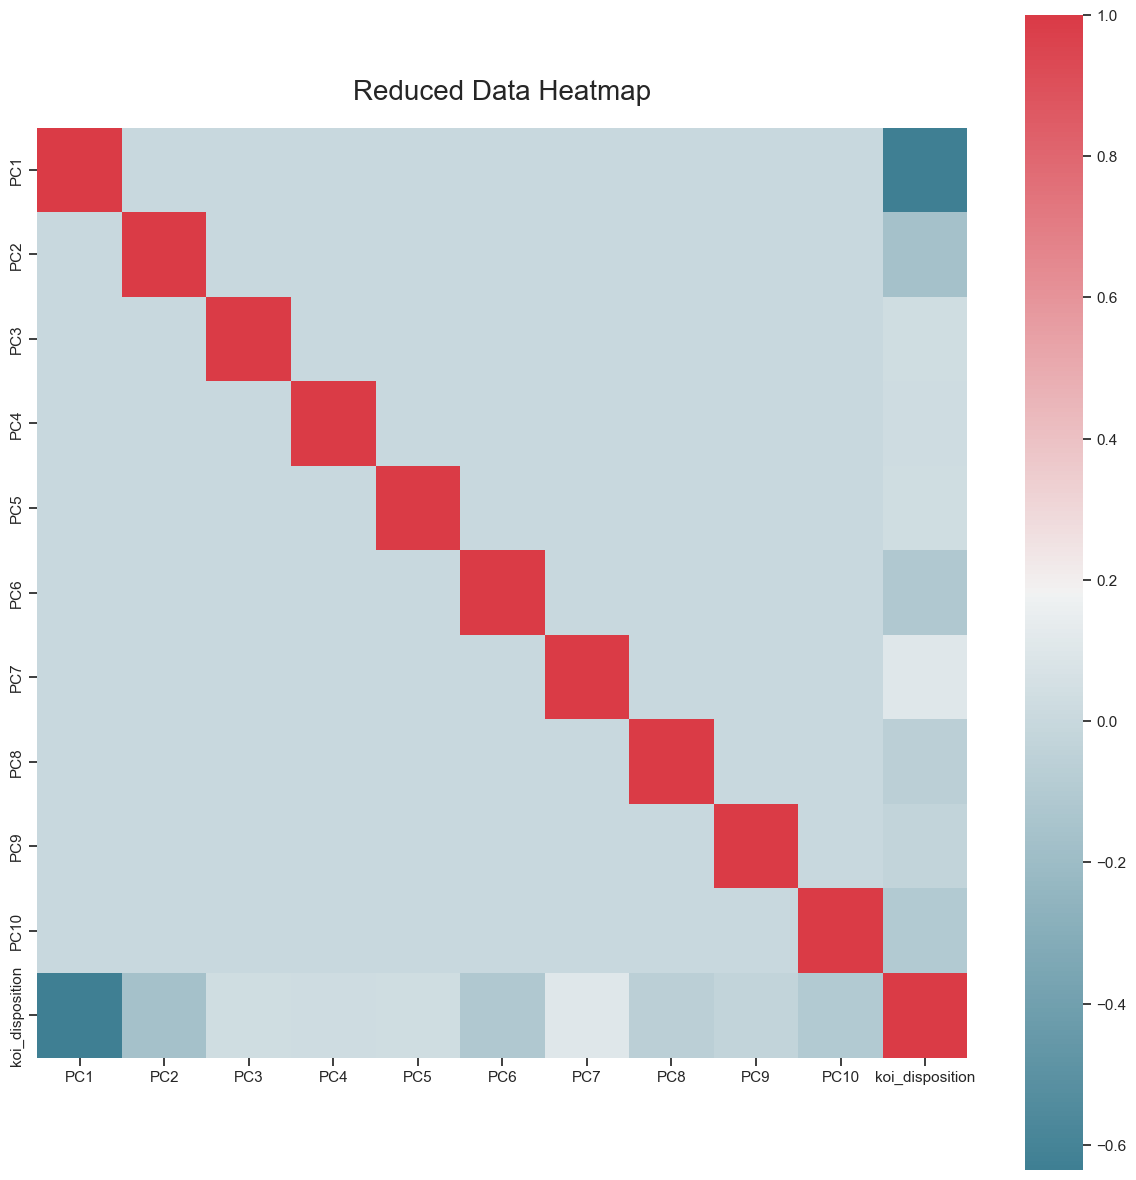

In [36]:
# Building a correlation matrix
corr = reduced_df.corr()
display(corr)

# add koi_disposition to the reduced_df
koi_reduced_df = reduced_df.copy()
koi_reduced_df['koi_disposition'] = df_filtered['koi_disposition'].values

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Reduced Data Heatmap', fontsize=20, pad=20)
plt.show()



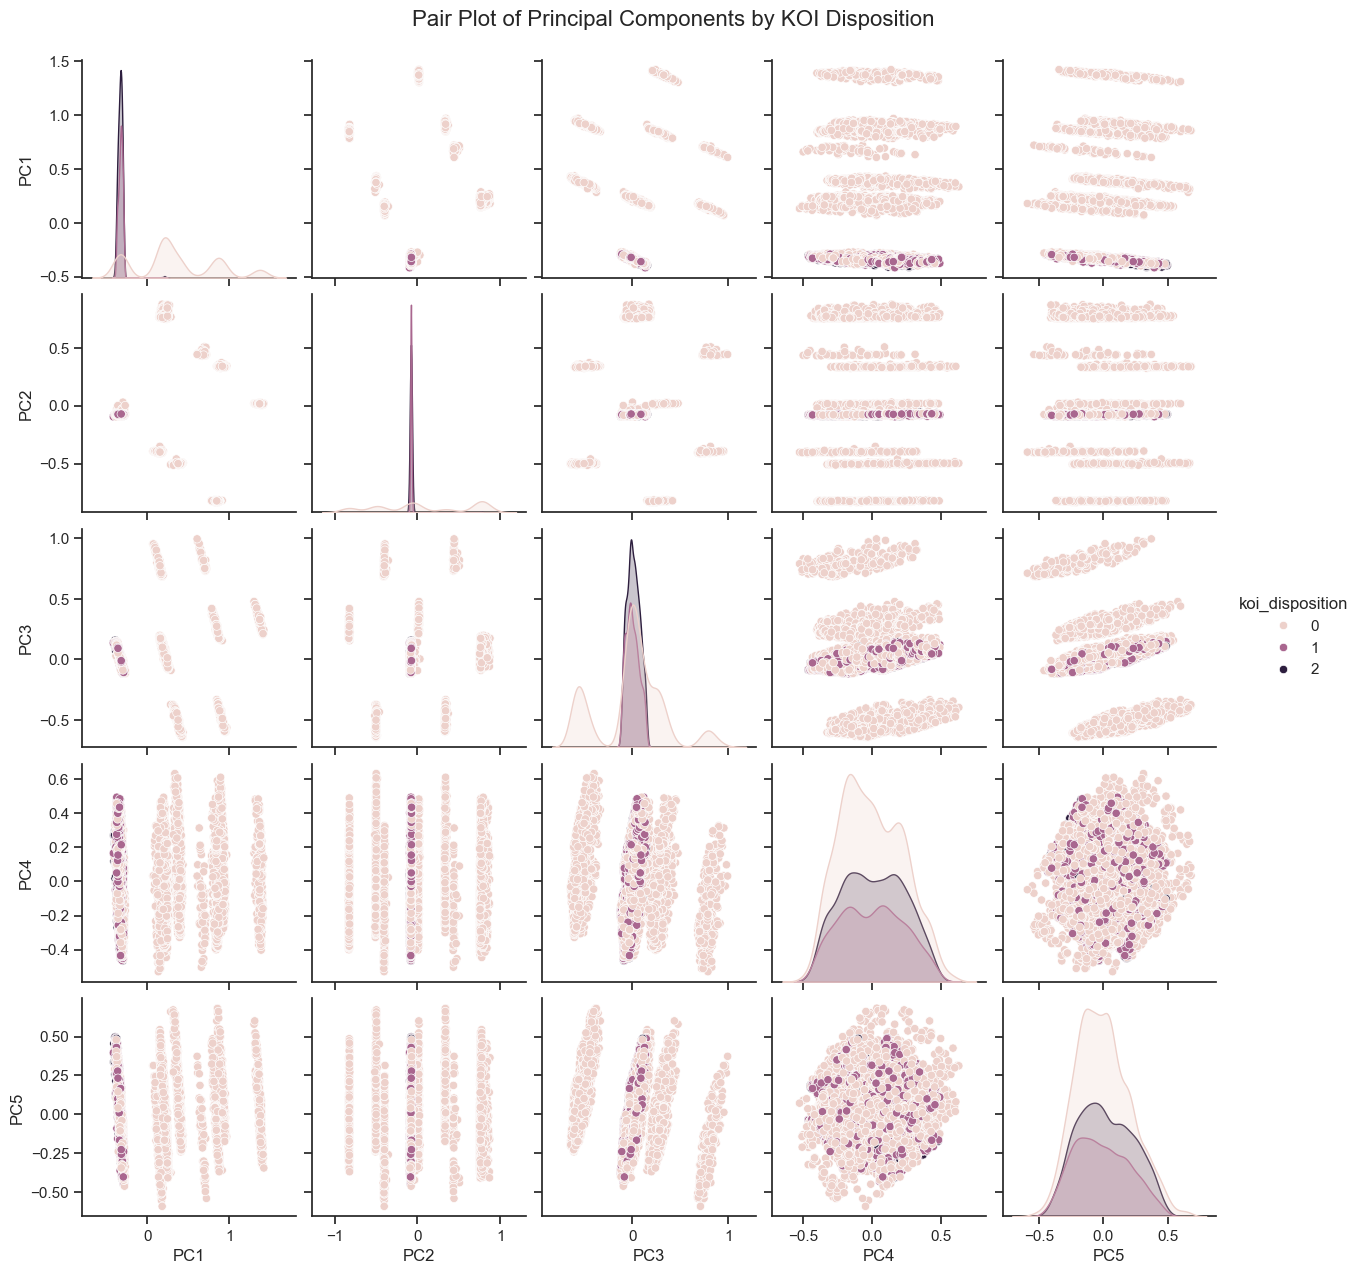

In [35]:
# Plotting the pair plot of the principal components
# Setting the aesthetic style of the plots
sns.set(style="ticks")

# Selecting a subset of the dataframe for the pairplot to avoid overplotting
# and focusing on the principal components and the disposition for coloring
pairplot_df = koi_reduced_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'koi_disposition']]

# Generating the pair plot
pairplot = sns.pairplot(pairplot_df, hue="koi_disposition")
pairplot.fig.suptitle('Pair Plot of Principal Components by KOI Disposition', fontsize=16, y=1.02)
plt.show()

### UMAP:
To better visualize the data, we have reduced it to two dimensions.

In [32]:
# import the libraries
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from dataclasses import replace
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN

### Visualization:

c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[[-1.2299497 -4.7926583]
 [ 6.3937454 -2.6071913]
 [-5.0091653 -1.6760079]
 ...
 [ 2.1753616 13.813896 ]
 [-1.2364025 -0.069399 ]
 [16.674583   1.1657813]]
(9201, 2)


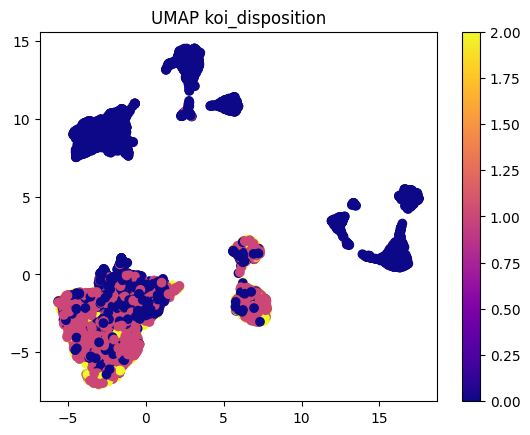

In [13]:
# UMAP
# remove the koi_disposition column since it is the target
test = df_filtered.iloc[:, 1:].values
# Standardizing the features
reducer = umap.UMAP(random_state=1)
scaled_test_data = StandardScaler().fit_transform(test)
# Applying UMAP
# create a new DataFrame
embedding = reducer.fit_transform(scaled_test_data)
print(embedding)
print(embedding.shape)
# plot the UMAP 
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=df_filtered.koi_disposition, 
    cmap='plasma'
)

plt.colorbar()
plt.title('UMAP koi_disposition')
plt.show()

Text(0.5, 1.0, 'UMAP koi_fpflag_ss')

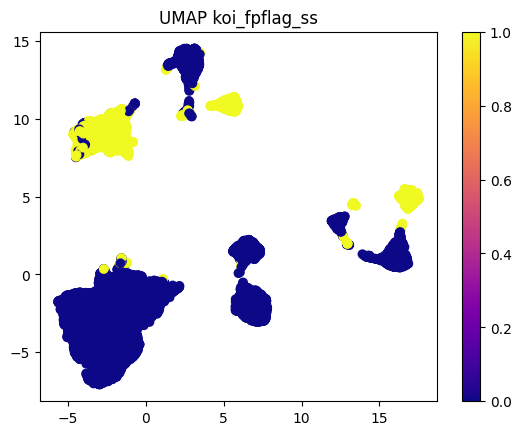

In [14]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_fpflag_ss,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_fpflag_ss')

Text(0.5, 1.0, 'UMAP koi_teq')

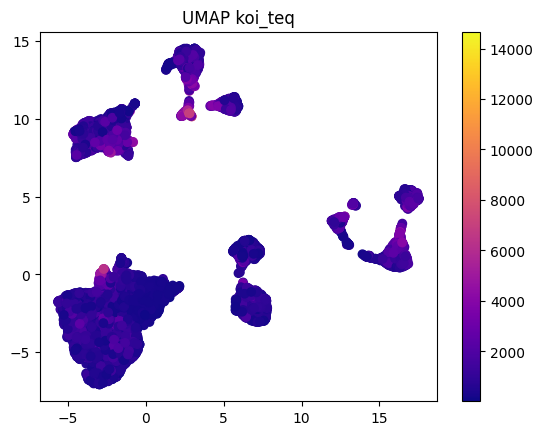

In [15]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_teq,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_teq')

Text(0.5, 1.0, 'UMAP koi_slogg')

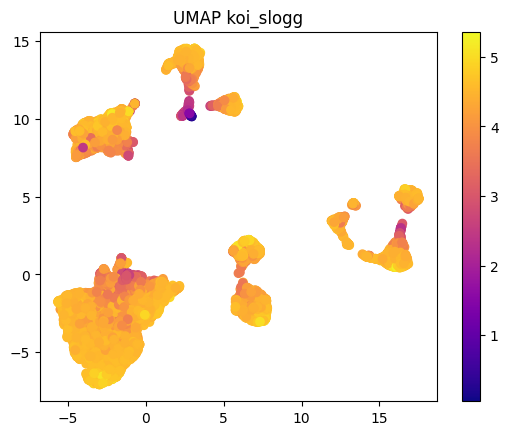

In [16]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_slogg,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_slogg')